# Predicting Toronto’s Airbnb Listing Prices

## Importing the libraries

In [1236]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from scipy import stats
from scipy.stats import norm, skew #for some statistics


from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

In [1237]:
#Importing the dataset:
listings_raw= pd.read_csv(r'C:\Users\user\Desktop\Ryerson University\Projects\My Project CIND820\Public Data\listings_Toronto_Dec_5.csv')

In [1238]:
print(f"The dataset contains {len(listings_raw)} Airbnb listings")

The dataset contains 15261 Airbnb listings


In [1239]:
pd.set_option('display.max_columns', len(listings_raw.columns)) # To view all columns
pd.set_option('display.max_rows', 200)
listings_raw.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1419,https://www.airbnb.com/rooms/1419,20211205213140,2021-12-06,Beautiful home in amazing area!,"This large, family home is located in one of T...",The apartment is located in the Ossington stri...,https://a0.muscache.com/pictures/76206750/d643...,1565,https://www.airbnb.com/users/show/1565,Alexandra,2008-08-08,"Vancouver, British Columbia, Canada","I live in Vancouver, Canada with my husband an...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/7aeea...,https://a0.muscache.com/im/pictures/user/7aeea...,Commercial Drive,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Toronto, Ontario, Canada",Little Portugal,NaN,43.64590,-79.42423,Entire residential home,Entire home/apt,10,NaN,3 baths,5.0,7.0,"[""Heating"", ""Shampoo"", ""First aid kit"", ""Fire ...",$469.00,28,730,28.0,28.0,730.0,730.0,28.0,730.0,NaN,t,0,0,0,0,2021-12-06,7,0,0,2015-07-19,2017-12-04,5.00,5.00,5.00,5.00,5.00,5.00,5.00,NaN,f,1,1,0,0,0.09
1,8077,https://www.airbnb.com/rooms/8077,20211205213140,2021-12-06,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,NaN,https://a0.muscache.com/pictures/11780344/141c...,22795,https://www.airbnb.com/users/show/22795,Kathie & Larry,2009-06-22,"Toronto, Ontario, Canada",My husband and I have been airbnb host for alm...,a few days or more,0%,NaN,f,https://a0.muscache.com/im/pictures/user/9a077...,https://a0.muscache.com/im/pictures/user/9a077...,Harbourfront,2.0,2.0,"['email', 'phone', 'facebook', 'reviews']",t,f,NaN,Waterfront Communities-The Island,NaN,43.64080,-79.37673,Private room in rental unit,Private room,2,NaN,1.5 baths,1.0,1.0,"[""Heating"", ""Shampoo"", ""Pool"", ""Elevator"", ""Ai...",$96.00,180,365,180.0,180.0,365.0,365.0,180.0,365.0,NaN,t,30,60,90,365,2021-12-06,169,0,0,2012-09-05,2013-08-27,4.84,4.81,4.89,4.87,4.90,4.92,4.83,NaN,t,2,1,1,0,1.50
2,23691,https://www.airbnb.com/rooms/23691,20211205213140,2021-12-06,Queen Bedroom close to downtown,<b>The space</b><br />Nestled in the middle of...,NaN,https://a0.muscache.com/pictures/615528/d09ab3...,93825,https://www.airbnb.com/users/show/93825,Yohan & Sarah,2010-03-15,"Toronto, Ontario, Canada",Welcome to our dwelling place! My wife and I l...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/93825/profile...,https://a0.muscache.com/im/users/93825/profile...,Fairbank,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,NaN,Briar Hill-Belgravia,NaN,43.69805,-79.45411,Private room in residential home,Private room,3,NaN,1 shared bath,1.0,1.0,"[""Dryer"", ""Stove"", ""Pocket wifi"", ""Washer"", ""I...",$72.00,28,28,28.0,28.0,28.0,28.0,28.0,28.0,NaN,t,30,60,90,365,2021-12-06,217,0,0,2011-08-22,2018-10-10,4.75,4.7

In [1240]:
listings_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15261 entries, 0 to 15260
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            15261 non-null  int64  
 1   listing_url                                   15261 non-null  object 
 2   scrape_id                                     15261 non-null  int64  
 3   last_scraped                                  15261 non-null  object 
 4   name                                          15260 non-null  object 
 5   description                                   14810 non-null  object 
 6   neighborhood_overview                         9239 non-null   object 
 7   picture_url                                   15261 non-null  object 
 8   host_id                                       15261 non-null  int64  
 9   host_url                                      15261 non-null 

In [1241]:
listings_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
id,15261.0,3.090755e+07,1.561377e+07,1.419000e+03,1.836737e+07,3.249823e+07,4.450433e+07,5.368448e+07
scrape_id,15261.0,2.021121e+13,2.894626e+00,2.021121e+13,2.021121e+13,2.021121e+13,2.021121e+13,2.021121e+13
host_id,15261.0,1.249332e+08,1.216209e+08,1.565000e+03,2.262621e+07,7.992063e+07,2.093466e+08,4.344476e+08
host_listings_count,15250.0,6.166820e+00,2.118872e+01,0.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00,2.720000e+02
host_total_listings_count,15250.0,6.166820e+00,2.118872e+01,0.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00,2.720000e+02
neighbourhood_group_cleansed,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,15261.0,4.368202e+01,4.904007e-02,4.358649e+01,4.364560e+01,4.366329e+01,4.370399e+01,4.383526e+01
longitude,15261.0,-7.939652e+01,6.582377e-02,-7.962120e+01,-7.942598e+01,-7.939653e+01,-7.937570e+01,-7.912801e+01
accommodates,15261.0,3.055960e+00,2.006350e+00,0.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
bathrooms,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


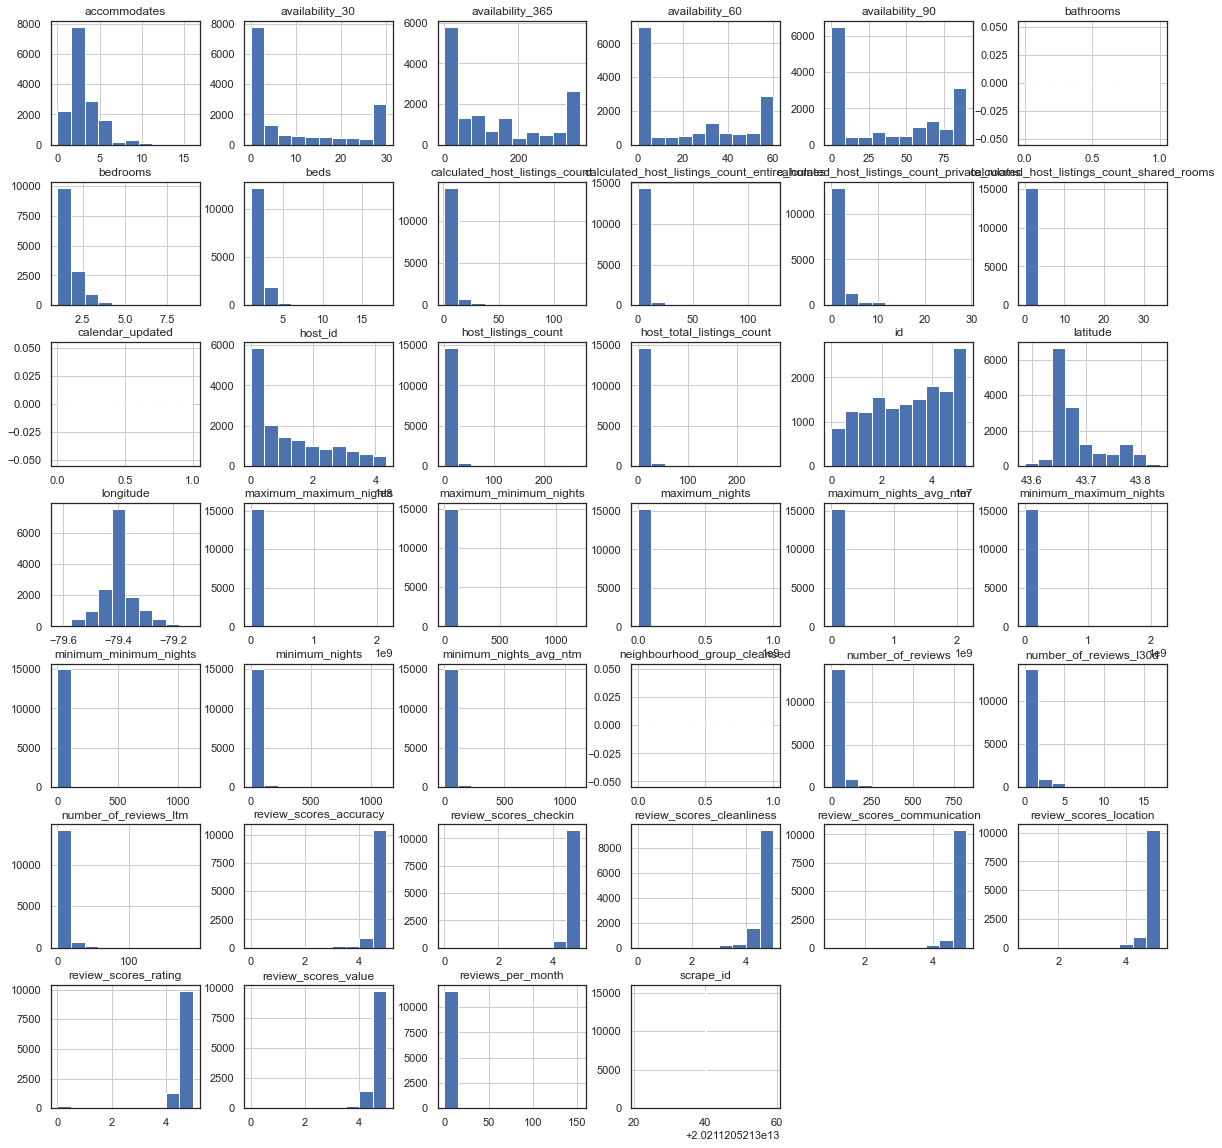

In [1242]:
# Plotting the distribution of numerical and boolean categories
listings_raw.hist(figsize=(20,20));

## 1. Pre-processing, Data Cleaning and Feature Engineering

In [1243]:
    #Dropping initial columns
        # As I am not using Natural Language Processing in creating the model, all free text columns will be dropped
        # Columns assumed to be irrelevant to price(e.g. url, host name and some host-related features that are unrelated to the property).
        # Columns with more than 30% missing data

In [1244]:
listings_raw.drop(['listing_url','scrape_id', 'last_scraped', 'name', 'description', 'neighborhood_overview','picture_url', 'host_id', 'host_url', 'host_name','host_since' ,'host_location', 'host_about', 'host_response_time', 'host_response_rate','host_acceptance_rate', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood','host_listings_count', 'host_verifications','neighbourhood', 'neighbourhood_group_cleansed', 'bathrooms','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','calendar_updated','availability_30','availability_60','availability_90','calendar_last_scraped','first_review','last_review', 'license', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month' ], axis=1, inplace=True)
listings_raw.set_index('id', inplace=True) # ID as index

In [1245]:
listings_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15261 entries, 1419 to 53684479
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_is_superhost            15250 non-null  object 
 1   host_total_listings_count    15250 non-null  float64
 2   host_has_profile_pic         15250 non-null  object 
 3   host_identity_verified       15250 non-null  object 
 4   neighbourhood_cleansed       15261 non-null  object 
 5   latitude                     15261 non-null  float64
 6   longitude                    15261 non-null  float64
 7   property_type                15261 non-null  object 
 8   room_type                    15261 non-null  object 
 9   accommodates                 15261 non-null  int64  
 10  bathrooms_text               15248 non-null  object 
 11  bedrooms                     14134 non-null  float64
 12  beds                         14523 non-null  float64
 13  amenities 

In [1246]:
    # Cleaning individual columns

In [1247]:
        # checking for missing data

In [1248]:
listings_raw.isna().sum() 

host_is_superhost                11
host_total_listings_count        11
host_has_profile_pic             11
host_identity_verified           11
neighbourhood_cleansed            0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms_text                   13
bedrooms                       1127
beds                            738
amenities                         0
price                             0
minimum_nights                    0
maximum_nights                    0
has_availability                  0
availability_365                  0
number_of_reviews                 0
number_of_reviews_ltm             0
number_of_reviews_l30d            0
review_scores_rating           3486
review_scores_accuracy         3653
review_scores_cleanliness      3651
review_scores_checkin          3654
review_scores_communication    3654
review_scores_location      

In [1249]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scipy in c:\users\user\anaconda3\lib\site-packages (from missingno) (1.5.0)



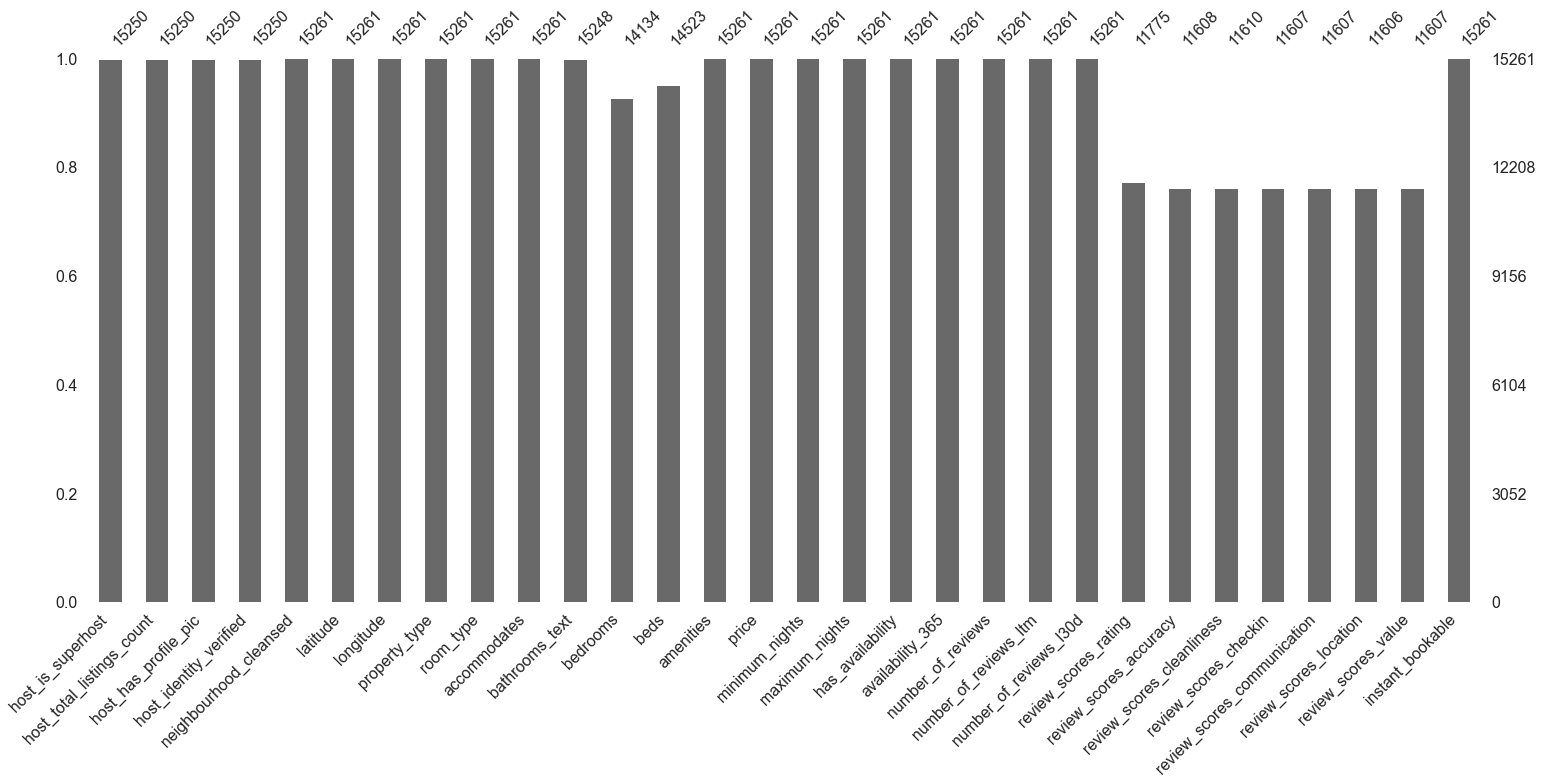

In [1250]:
import missingno as msno
msno.bar(listings_raw)

In [1251]:
# Filling miising values with 'mean' for the numerical data

for col in ['review_scores_value', 'review_scores_location', 'review_scores_communication', 'review_scores_checkin', 'review_scores_cleanliness', 'review_scores_accuracy', 'review_scores_rating']:
    listings_raw[col].fillna(listings_raw[col].mean(), inplace=True)

In [1252]:
#for col in listings_raw[ 'bathrooms_text','host_is_superhost', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified'].fillna(listings_raw[col].mode()[0], inplace=True)
#for col in listings_raw['bathrooms_text', 'host_is_superhost', 'host_total_listings_count', 'host_has_profile_pic', 'host_identify_verefied'

# Filling missing values with mode
listings_raw[col].fillna(listings_raw[col].mode()[0],inplace=True)

In [1253]:
listings_raw['bathrooms_text'].fillna(listings_raw['bathrooms_text'].mode()[0], inplace=True)
listings_raw['host_is_superhost'].fillna(listings_raw['host_is_superhost'].mode()[0], inplace=True)
listings_raw['host_total_listings_count'].fillna(listings_raw['host_total_listings_count'].mode()[0], inplace=True)
listings_raw['host_has_profile_pic'].fillna(listings_raw['host_has_profile_pic'].mode()[0], inplace=True)
listings_raw['host_identity_verified'].fillna(listings_raw['host_identity_verified'].mode()[0], inplace=True)

In [1254]:
for col in ['beds','bedrooms']:
    listings_raw[col].fillna(listings_raw[col].median(), inplace=True)

In [1255]:
listings_raw.isna().sum()

host_is_superhost              0
host_total_listings_count      0
host_has_profile_pic           0
host_identity_verified         0
neighbourhood_cleansed         0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms_text                 0
bedrooms                       0
beds                           0
amenities                      0
price                          0
minimum_nights                 0
maximum_nights                 0
has_availability               0
availability_365               0
number_of_reviews              0
number_of_reviews_ltm          0
number_of_reviews_l30d         0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
instant_bookable               0
dtype: int

In [1256]:
        # Converting categorical Features:

In [1257]:
listings_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15261 entries, 1419 to 53684479
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_is_superhost            15261 non-null  object 
 1   host_total_listings_count    15261 non-null  float64
 2   host_has_profile_pic         15261 non-null  object 
 3   host_identity_verified       15261 non-null  object 
 4   neighbourhood_cleansed       15261 non-null  object 
 5   latitude                     15261 non-null  float64
 6   longitude                    15261 non-null  float64
 7   property_type                15261 non-null  object 
 8   room_type                    15261 non-null  object 
 9   accommodates                 15261 non-null  int64  
 10  bathrooms_text               15261 non-null  object 
 11  bedrooms                     15261 non-null  float64
 12  beds                         15261 non-null  float64
 13  amenities 

In [1258]:
# Normalize price column by deleting the $ sign and convert to numeric
import locale
locale.setlocale(locale.LC_ALL,'')
listings_raw['price']=listings_raw.price.map(lambda x: locale.atof(x.strip('$')))

In [1259]:
listings_raw.head(3)

,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1419,f,1.0,t,t,Little Portugal,43.64590,-79.42423,Entire residential home,Entire home/apt,10,3 baths,5.0,7.0,"[""Heating"", ""Shampoo"", ""First aid kit"", ""Fire ...",469.0,28,730,t,0,7,0,0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,f
8077,f,2.0,t,f,Waterfront Communities-The Island,43.64080,-79.37673,Private room in rental unit,Private room,2,1.5 baths,1.0,1.0,"[""Heating"", ""Shampoo"", ""Pool"", ""Elevator"", ""Ai...",96.0,180,365,t,365,169,0,0,4.84,4.81,4.89,4.87,4.90,4.92,4.83,t
23691,f,2.0,t,t,Briar Hill-Belgravia,43.69805,-79.45411,Private room in residential home,Private room,3,1 shared bath,1.0,1.0,"[""Dryer"", ""Stove"", ""Pocket wifi"", ""Washer"", ""I...",72.0,28,28,t,365,217,0,0,4.75,4.73,4.82,4.90,4.93,4.34,4.73,t


In [1260]:
print(f"Nightly advertised prices range from ${min(listings_raw.price)} to ${max(listings_raw.price)}.")

Nightly advertised prices range from $0.0 to $13000.0.


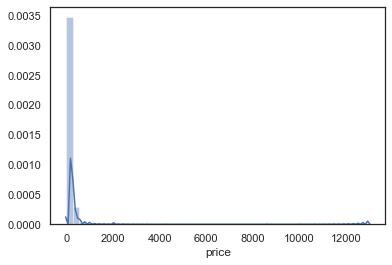

In [1261]:
sns.distplot(listings_raw['price'])

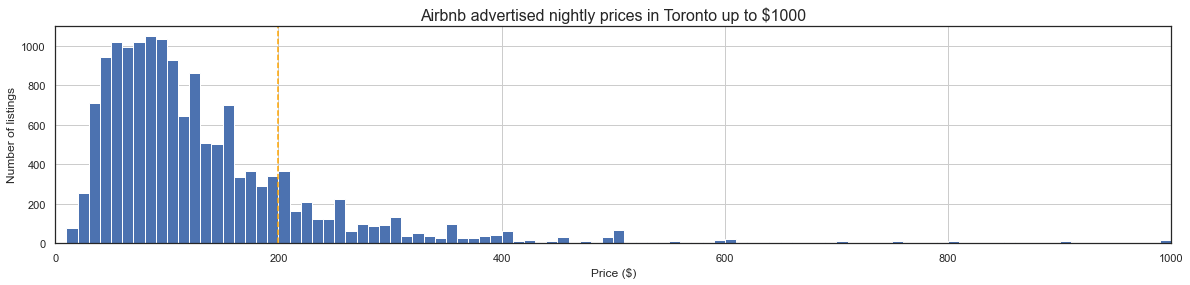

In [1262]:
# Distribution of prices from $0 
plt.figure(figsize=(20,4))
listings_raw.price.hist(bins=100, range=(0,1000))
plt.margins(x=0)
plt.axvline(200, color='orange', linestyle='--')
plt.title("Airbnb advertised nightly prices in Toronto up to $1000", fontsize=16)
plt.xlabel("Price ($)")
plt.ylabel("Number of listings")
plt.show()

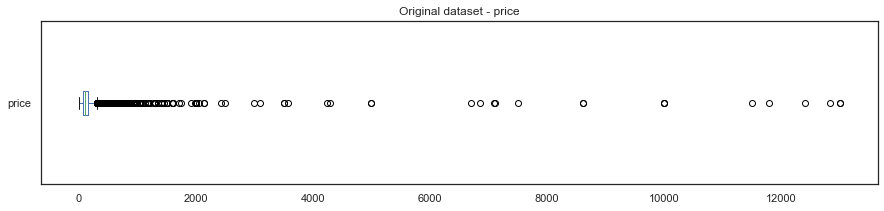

IQR price:  98.0
Upper limit:  312.0
Lower limit:  -80.0
983 Entries above upper limit
6.44% of dataset


In [1263]:
# Displaying the box plot for price
fig, ax = plt.subplots(figsize=(15,3))
listings_raw['price'].plot(kind='box', vert=False)
ax.set_title('Original dataset - price')
plt.show()

# IQR rule for variable price
q1_price = listings_raw.price.quantile(q=0.25)
q3_price = listings_raw.price.quantile(q=0.75)
IQR_price = q3_price - q1_price

print('IQR price: ', IQR_price)

sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Upper limit: ', sup_price)
print('Lower limit: ', inf_price)


print("{} Entries above upper limit".format(len(listings_raw[listings_raw.price > sup_price])))
print("{:.2f}% of dataset".format((len(listings_raw[listings_raw.price > sup_price]) / listings_raw.shape[0])*100))

In [1264]:
listings_raw = listings_raw[listings_raw.price < 600]

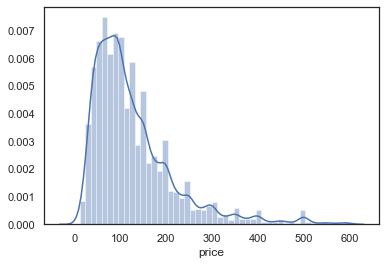

In [1265]:
sns.distplot(listings_raw['price'])